### Importing Libraries and modules

In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pandas as pd
# from telethon import TelegramClient, events
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Scripts'))
from Preprocess import Preprocess
from data_loader import DataLoad
from plot import Visualization
from named_entity_recognation import CoNLLLabeler
from fine_tune_ner_model import NERFineTuner
from Model_comparision import NERModelComparison
from selected_model import NERModelExplainability
from Model_interpretability import NERModelExplainabilityLIME
# from telegram_scrapper import DataCrawling

In [2]:
# pip install fsspec==2023.6.0

In [3]:
# pip install lime

In [4]:
# pip install datasets

In [ ]:
# pip install pandas
# pip install transformers
# pip install datasets
# pip install evaluate
# pip install seqeval

### Intantitioninstantiating Classes

In [ ]:
preprocess = Preprocess()
data_load = DataLoad()
plot = Visualization()


### Read and load data of different CSV files and merging it then save it in one dataframe

In [ ]:
result = data_load.read_csv_txt_data()

### Read labeled data using DataFraem

In [ ]:
labeled_data = data_load.lalebed_file()

In [ ]:
labeled_data.head()

Token      Label
0      3pcs  B-PRODUCT
1   silicon  I-PRODUCT
2     brush  I-PRODUCT
3  spatulas  I-PRODUCT
4       እስከ          O

In [ ]:
result.shape

(66437, 6)

In [ ]:
result.head()

Channel Title    Channel Username    ID Message  \
0  Sheger online-store  @Shageronlinestore  6202     NaN   
1  Sheger online-store  @Shageronlinestore  6201     NaN   
2  Sheger online-store  @Shageronlinestore  6200     NaN   
3  Sheger online-store  @Shageronlinestore  6199     NaN   
4  Sheger online-store  @Shageronlinestore  6198     NaN   

                        Date                           Media Path  
0  2025-01-15 16:11:58+00:00  photos2/@Shageronlinestore_6202.jpg  
1  2025-01-15 16:11:58+00:00  photos2/@Shageronlinestore_6201.jpg  
2  2025-01-15 16:11:58+00:00  photos2/@Shageronlinestore_6200.jpg  
3  2025-01-15 16:11:57+00:00  photos2/@Shageronlinestore_6199.jpg  
4  2025-01-15 16:11:57+00:00  photos2/@Shageronlinestore_6198.jpg

### Data Tokenization, Normalizatio using Positional Tokenization

In [ ]:
# Apply the tokenization function to your DataFrame
result = preprocess.tokenize_dataframe(result, message_column='Message')

### Prepare Data as Cleaned Structure

In [ ]:
result = preprocess.clean_structure(result)

In [ ]:
result.tail(3)

Channel Title Channel Username  ID                       Date  \
66434  qnash.com - ቅናሽ ®️        @qnashcom  18  2020-08-26 02:16:56+00:00   
66435  qnash.com - ቅናሽ ®️        @qnashcom  17  2020-08-25 17:14:43+00:00   
66436  qnash.com - ቅናሽ ®️        @qnashcom   1  2020-05-22 04:16:48+00:00   

                             Media Path  \
66434  qnashcom_photos/@qnashcom_18.jpg   
66435                               NaN   
66436                               NaN   

                                                 Content  \
66434  😍  ታላቅ ቅናሽ 😍\nዘመናዊ መደርደሪያው ብረት የሆነ ጫማ መደርደሪያ\n...   
66435                                                NaN   
66436                                                NaN   

                                               input_ids  \
66434  [[101, 100, 100, 100, 100, 100, 100, 100, 100,...   
66435                                               None   
66436                                               None   

                                          attention_mask  \
66434  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...   
66435                                               None   
66436                                               None   

                                          token_type_ids  \
66434  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
66435                                               None   
66436                                               None   

                                            position_ids  
66434  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
66435                                               None  
66436                                               None

### Store Preprocessed Data in to SQLit Database

In [ ]:
# Store preprocessed data to sqlit database
preprocess.store_preprocessed_data(result)

### Read Save Data from SQLit Database

In [ ]:
# Fetch The data from SQLit Database
result = preprocess.ReadSavedDate('telegram_data.db', 'telegram_messages')

In [ ]:
print(result.shape)
result.head()

(66437, 11)


id  MESSAGE_ID        Channel_Title    Channel_Username  \
0   1        6202  Sheger online-store  @Shageronlinestore   
1   2        6201  Sheger online-store  @Shageronlinestore   
2   3        6200  Sheger online-store  @Shageronlinestore   
3   4        6199  Sheger online-store  @Shageronlinestore   
4   5        6198  Sheger online-store  @Shageronlinestore   

                  Date                           Media_Path Content input_ids  \
0  2025-01-15T16:11:58  photos2/@Shageronlinestore_6202.jpg    None      None   
1  2025-01-15T16:11:58  photos2/@Shageronlinestore_6201.jpg    None      None   
2  2025-01-15T16:11:58  photos2/@Shageronlinestore_6200.jpg    None      None   
3  2025-01-15T16:11:57  photos2/@Shageronlinestore_6199.jpg    None      None   
4  2025-01-15T16:11:57  photos2/@Shageronlinestore_6198.jpg    None      None   

  attention_mask token_type_ids position_ids  
0           None           None         None  
1           None           None         None  
2           None           None         None  
3           None           None         None  
4           None           None         None

In [ ]:
# preprocess.filter_amharic_text(df)

# Apply the filter function to the Content column
result['Filtered_Content'] = result['Content'].apply(preprocess.filter_amharic_text)

# Display the resulting DataFrame
result.tail()

id  MESSAGE_ID       Channel_Title Channel_Username  \
66432  66433          20  qnash.com - ቅናሽ ®️        @qnashcom   
66433  66434          19  qnash.com - ቅናሽ ®️        @qnashcom   
66434  66435          18  qnash.com - ቅናሽ ®️        @qnashcom   
66435  66436          17  qnash.com - ቅናሽ ®️        @qnashcom   
66436  66437           1  qnash.com - ቅናሽ ®️        @qnashcom   

                      Date                        Media_Path  \
66432  2020-08-26T02:44:03  qnashcom_photos/@qnashcom_20.jpg   
66433  2020-08-26T02:32:16  qnashcom_photos/@qnashcom_19.jpg   
66434  2020-08-26T02:16:56  qnashcom_photos/@qnashcom_18.jpg   
66435  2020-08-25T17:14:43                              None   
66436  2020-05-22T04:16:48                              None   

                                                 Content  \
66432  👔የልብስ መተኮሻ ቴብል ከ ኦርጅናል ስቲም ካውያ ጋር \n  -የራሱ መቆጣ...   
66433  🚫ቤትዎን ከአይጥ 🐀 ከበረሮ🕷 እና ከተባይ🐜 🚫\n               ...   
66434  😍  ታላቅ ቅናሽ 😍\nዘመናዊ መደርደሪያው ብረት የሆነ ጫማ መደርደሪያ\n...   
66435                                               None   
66436                                               None   

                                               input_ids  \
66432  [[101, 100, 100, 100, 100, 100, 100, 100, 100,...   
66433  [[101, 100, 100, 100, 100, 100, 100, 100, 100,...   
66434  [[101, 100, 100, 100, 100, 100, 100, 100, 100,...   
66435                                               None   
66436                                               None   

                                          attention_mask  \
66432  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...   
66433  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...   
66434  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...   
66435                                               None   
66436                                               None   

                                          token_type_ids  \
66432  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
66433  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
66434  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
66435                                               None   
66436                                               None   

                                            position_ids  \
66432  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
66433  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
66434  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
66435                                               None   
66436                                               None   

                                        Filtered_Content  
66432  የልብስ መተኮሻ ቴብል ከ ኦርጅናል ስቲም ካውያ ጋር የራሱ መቆጣጠሪያ ያለ...  
66433  ቤትዎን ከአይጥ ከበረሮ እና ከተባይ ነፃ ያድርጉ በቀላሉ በማንኛውም ሶኬት...  
66434  ታላቅ ቅናሽ ዘመናዊ መደርደሪያው ብረት የሆነ ጫማ መደርደሪያ ባለ ዘጠኝ ...  
66435                                               None  
66436                                               None

In [ ]:
df = result
# Replace "None" strings with actual NaN values
df.replace("None", pd.NA, inplace=True)

In [ ]:
# pip install matplotlib seaborn missingno

### Transform Date in to Date time format, then check top five values

In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# ===== EDA =====
print("\n--- Data Overview ---")
df.head()  # Display the first few rows



--- Data Overview ---


id  MESSAGE_ID        Channel_Title    Channel_Username  \
0   1        6202  Sheger online-store  @Shageronlinestore   
1   2        6201  Sheger online-store  @Shageronlinestore   
2   3        6200  Sheger online-store  @Shageronlinestore   
3   4        6199  Sheger online-store  @Shageronlinestore   
4   5        6198  Sheger online-store  @Shageronlinestore   

                 Date                           Media_Path Content input_ids  \
0 2025-01-15 16:11:58  photos2/@Shageronlinestore_6202.jpg    <NA>      <NA>   
1 2025-01-15 16:11:58  photos2/@Shageronlinestore_6201.jpg    <NA>      <NA>   
2 2025-01-15 16:11:58  photos2/@Shageronlinestore_6200.jpg    <NA>      <NA>   
3 2025-01-15 16:11:57  photos2/@Shageronlinestore_6199.jpg    <NA>      <NA>   
4 2025-01-15 16:11:57  photos2/@Shageronlinestore_6198.jpg    <NA>      <NA>   

  attention_mask token_type_ids position_ids Filtered_Content  
0           <NA>           <NA>         <NA>             None  
1           <NA>           <NA>         <NA>             None  
2           <NA>           <NA>         <NA>             None  
3           <NA>           <NA>         <NA>             None  
4           <NA>           <NA>         <NA>             None

### Check Data Types

In [ ]:
print("\n--- Data Types ---")
print(df.dtypes)  # Display column data types


--- Data Types ---
id                           int64
MESSAGE_ID                   int64
Channel_Title               object
Channel_Username            object
Date                datetime64[ns]
Media_Path                  object
Content                     object
input_ids                   object
attention_mask              object
token_type_ids              object
position_ids                object
Filtered_Content            object
dtype: object


### Check Missing Values

In [ ]:
print("\n--- Missing Values ---")
print(df.isnull().sum())  # Count missing values per column


--- Missing Values ---
id                      0
MESSAGE_ID              0
Channel_Title           0
Channel_Username        0
Date                    0
Media_Path          12115
Content             24392
input_ids           24392
attention_mask      24392
token_type_ids      24392
position_ids        24392
Filtered_Content    27876
dtype: int64


### Visualize missing values

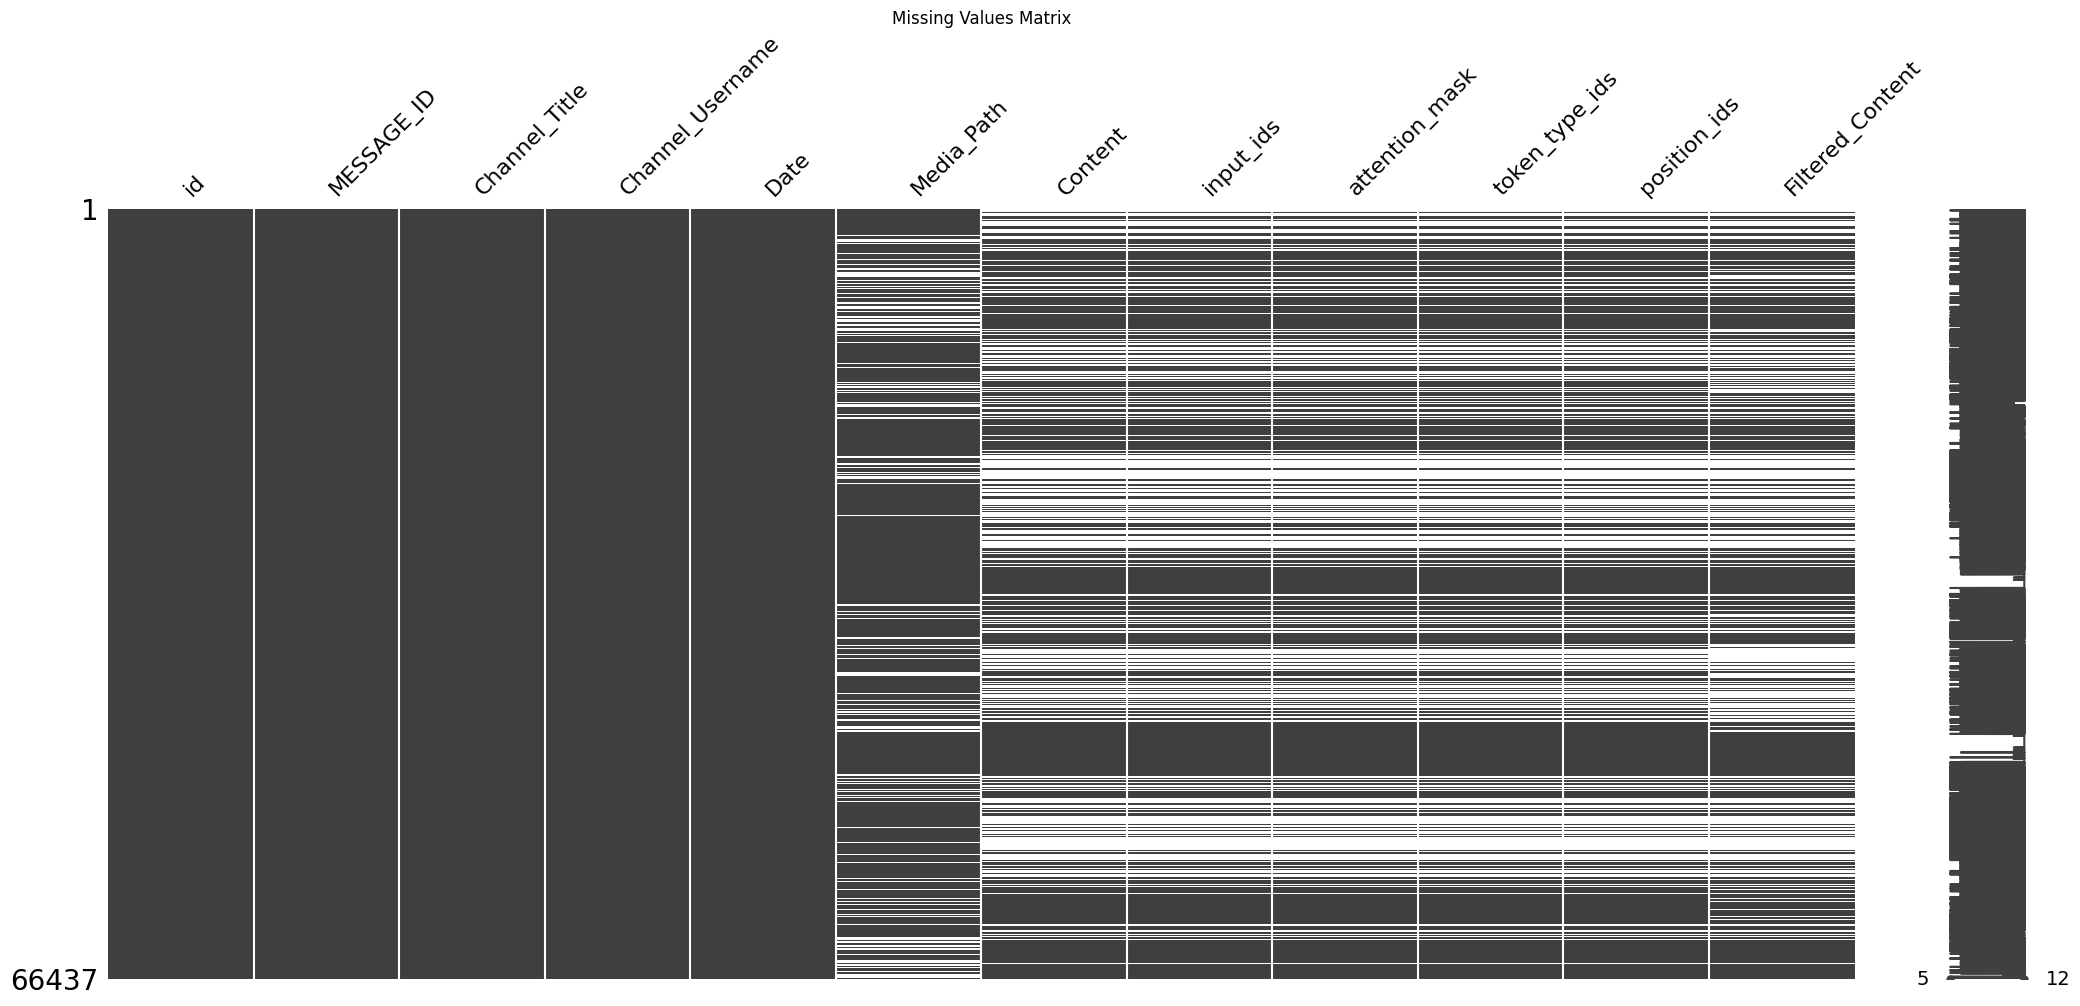

In [ ]:
# Visualize missing values
plot.Visualize_missing_values(df)

### Check summary statistics

In [ ]:
# Summary statistics
print("\n--- Summary Statistics Object Datatypes---")
df.describe(include='object').T


--- Summary Statistics Object Datatypes---


count unique                               top  freq
Channel_Title     66437     15                  AwasMart-አዋስማርት🎁  7718
Channel_Username  66437     15                         @AwasMart  7718
Media_Path        54322  54322  qnashcom_photos/@qnashcom_18.jpg     1
Content           42045  27863                          Sold out   262
input_ids         42045   9606                      [[101, 102]]  5036
attention_mask    42045    184                          [[1, 1]]  5036
token_type_ids    42045    184                          [[0, 0]]  5036
position_ids      42045    184                            [0, 1]  5036
Filtered_Content  38561  21933          ይሄንን ተጭነው ያድርጉ፣ ቤተሰብ ይሁኑ   151

In [ ]:
# Summary statistics
print("\n--- Summary Statistics Number Datatypes---")
df.describe().T


--- Summary Statistics Number Datatypes---


count                           mean                  min  \
id          66437.0                        33219.0                  1.0   
MESSAGE_ID  66437.0                    4494.343935                  1.0   
Date          66437  2023-02-02 11:42:14.656908032  2017-11-30 19:27:07   

                            25%                  50%                  75%  \
id                      16610.0              33219.0              49828.0   
MESSAGE_ID               2086.0               3870.0               6086.0   
Date        2022-04-04 05:39:35  2023-06-20 07:30:49  2024-04-13 09:27:43   

                            max           std  
id                      66437.0  19178.854254  
MESSAGE_ID              15318.0   3215.283784  
Date        2025-01-16 12:07:30           NaN

## ===== Data Cleaning =====

### Handle Missing Values

In [ ]:
# ===== Data Cleaning =====
# Handle missing values
df_cleaned = preprocess.handlling_missing_values(df)
df_cleaned.isna().sum()


--- Handling Missing Values ---


id                      0
MESSAGE_ID              0
Channel_Title           0
Channel_Username        0
Date                    0
Media_Path              0
Content                 0
input_ids               0
attention_mask          0
token_type_ids          0
position_ids            0
Filtered_Content    27876
dtype: int64

### Handle duplicate data

In [ ]:
# Handle duplicate data
df_cleaned = preprocess.check_and_handlling_duplicate_values(df_cleaned)


--- Checking Duplicates ---
Number of duplicate rows: 0


### Check datetime Range

In [ ]:
# Basic datetime analysis
print("\n--- Date Analysis ---")
print(f"Date range: {df_cleaned['Date'].min()} to {df_cleaned['Date'].max()}")


--- Date Analysis ---
Date range: 2017-11-30 19:27:07 to 2025-01-16 12:07:30


### Message count per username

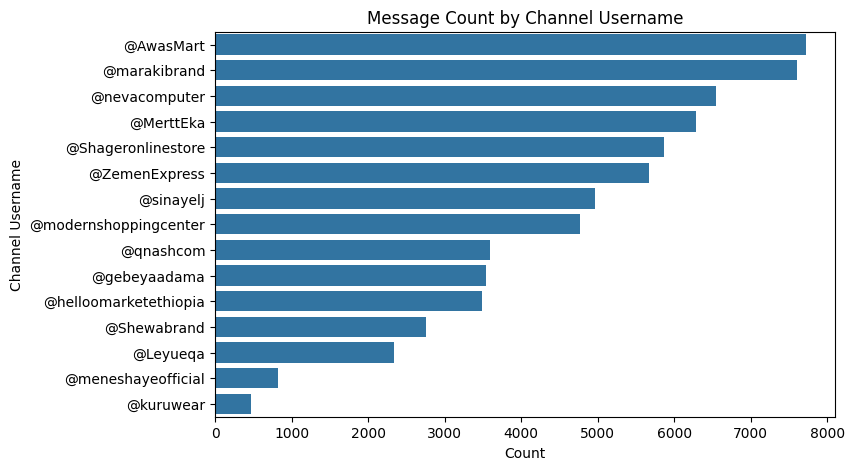

In [ ]:
# ===== Visualization =====
# Message count per username
plot.message_count_per_username(df_cleaned)

### Messages over time (trend)

In [ ]:
# Messages over time (trend)
plot.messages_over_time_trend(df_cleaned)

### Distribution of Message IDs

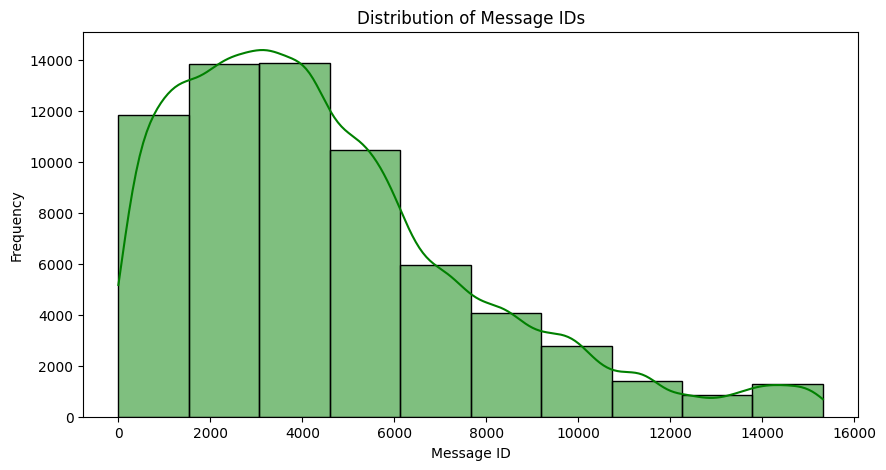

In [ ]:
# Distribution of Message IDs
plot.Distribution_of_Message_IDs(df_cleaned)

In [ ]:
# plot.Distribution_of_Content(df_cleaned)

### Word count in 'Content'

In [ ]:
#  Word count in 'Content' (if available)
plot.word_count_in_content(df_cleaned)

In [ ]:
# # ===== Save Cleaned Data =====
# cleaned_data_path = "cleaned_telegram_data.csv"
# df_cleaned.to_csv(cleaned_data_path, index=False)
# print(f"\nCleaned data saved to: {cleaned_data_path}")

In [ ]:
labeled_data.head()

Token      Label
0      3pcs  B-PRODUCT
1   silicon  I-PRODUCT
2     brush  I-PRODUCT
3  spatulas  I-PRODUCT
4       እስከ          O

### Task 2
#### CoNLLLabeler

In [ ]:
# Initialize the CoNLLLabeler
labeler = CoNLLLabeler(dataset=df_cleaned, labeled_data=labeled_data)

### Process 30 messages

In [ ]:
# Process 30 messages (or as many as are available)
labeled_messages = labeler.process_messages(num_messages=30)

### Save the labeled messages in CoNLL format

In [ ]:
# Save the labeled messages in CoNLL format
output_path = "labeled_data.conll"
labeler.save_conll_format(labeled_messages, output_path)


print(f"Labeled data saved in CoNLL format to {output_path}")

Labeled data saved in CoNLL format to labeled_data.conll


In [ ]:
fine_tuner = NERFineTuner("xlm-roberta-base")
tokenized_datasets = fine_tuner.prepare_data("labeled_data.conll")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/23 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

In [ ]:
fine_tuner = NERFineTuner("xlm-roberta-base")
tokenized_datasets = fine_tuner.prepare_data("labeled_data.conll")

Map:   0%|          | 0/23 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# tokenized_datasets

In [ ]:
fine_tuner.train(tokenized_datasets, "./ner_model")


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/content/fine_tune_ner_model.py:375: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Task 4**

In [ ]:
model_names = ["xlm-roberta-base",
               "distilbert-base-uncased",
               "bert-base-multilingual-cased"]


In [ ]:
tokenizer_names = ["xlm-roberta-base",
                   "distilbert-base-uncased",
                   "bert-base-multilingual-cased"]


In [ ]:
comparison = NERModelComparison("labeled_data.conll", tokenizer_names, model_names)


In [ ]:
comparison.compare_models()

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/e73636d4f797dec63c3081bb6ed5c7b0bb3f2089/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/e7363

Training and evaluating xlm-roberta-base...


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/e73636d4f797dec63c3081bb6ed5c7b0bb3f2089/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/e7363

Map:   0%|          | 0/23 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/e73636d4f797dec63c3081bb6ed5c7b0bb3f2089/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/e7363


***** Running Evaluation *****
  Num examples = 6
  Batch size = 8
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Saving model checkpoint to ./results_xlm-roberta-base/checkpoint-3
Configuration saved in ./results_xlm-roberta-base/checkpoint-3/config.json
Model weights saved in ./results_xlm-roberta-base/checkpoint-3/model.safetensors

***** Running Evaluation *****
  Num examples = 6
  Batch size = 8
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Saving 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Saving model checkpoint to ./results_xlm-roberta-base/checkpoint-9
Configuration saved in ./results_xlm-roberta-base/checkpoint-9/config.json
Model weights saved in ./results_xlm-roberta-base/checkpoint-9/model.safetensors


Training completed. Do not forget to share your model on huggingface.co/models =)



***** Running Evaluation *****
  Num examples = 6
  Batch size = 8


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/12040accade4e8a0f71eabdb258fecc2e7e948be/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transform

xlm-roberta-base Evaluation Results: {'eval_f1': 0.7851338355505689, 'eval_loss': 0.5422604084014893, 'eval_precision': 0.7273719457416715, 'eval_recall': 0.8528610354223434, 'eval_runtime': 2.3972, 'eval_samples_per_second': 2.503, 'eval_steps_per_second': 0.417, 'epoch': 3.0}
xlm-roberta-base Training Time: 921.7278501987457 seconds
xlm-roberta-base Epoch Metrics:
Epoch 1: {'eval_f1': 0.7851338355505689, 'eval_loss': 0.9150972962379456, 'eval_precision': 0.7273719457416715, 'eval_recall': 0.8528610354223434}
Epoch 2: {'loss': 1.0283, 'grad_norm': 8.31987190246582, 'learning_rate': 8.888888888888888e-06, 'epoch': 1.6666666666666665}
Epoch 3: {'eval_f1': 0.7851338355505689, 'eval_loss': 0.6426761746406555, 'eval_precision': 0.7273719457416715, 'eval_recall': 0.8528610354223434}
Epoch 4: {'eval_f1': 0.7851338355505689, 'eval_loss': 0.5422604084014893, 'eval_precision': 0.7273719457416715, 'eval_recall': 0.8528610354223434}
Epoch 5: {'train_runtime': 921.2691, 'train_samples_per_second':

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/e73636d4f797dec63c3081bb6ed5c7b0bb3f2089/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/e7363

Map:   0%|          | 0/23 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/12040accade4e8a0f71eabdb258fecc2e7e948be/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.47.1",
  "vocab_size": 30522
}

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/12040accade4e8a0f71eabdb258fecc2e7e948be/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapsh


***** Running Evaluation *****
  Num examples = 6
  Batch size = 8
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Saving model checkpoint to ./results_distilbert-base-uncased/checkpoint-3
Configuration saved in ./results_distilbert-base-uncased/checkpoint-3/config.json
Model weights saved in ./results_distilbert-base-uncased/checkpoint-3/model.safetensors

***** Running Evaluation *****
  Num examples = 6
  Batch size = 8
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/3f076fdb1ab68d5b2880cb87a0886f315b8146f8/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "p

distilbert-base-uncased Evaluation Results: {'eval_f1': 0.7932955729305557, 'eval_loss': 0.5306641459465027, 'eval_precision': 0.7372142663609149, 'eval_recall': 0.8586118251928021, 'eval_runtime': 1.54, 'eval_samples_per_second': 3.896, 'eval_steps_per_second': 0.649, 'epoch': 3.0}
distilbert-base-uncased Training Time: 156.47704315185547 seconds
distilbert-base-uncased Epoch Metrics:
Epoch 1: {'eval_f1': 0.7932955729305557, 'eval_loss': 0.7195578217506409, 'eval_precision': 0.7372142663609149, 'eval_recall': 0.8586118251928021}
Epoch 2: {'loss': 0.9993, 'grad_norm': 3.680429697036743, 'learning_rate': 8.888888888888888e-06, 'epoch': 1.6666666666666665}
Epoch 3: {'eval_f1': 0.7932955729305557, 'eval_loss': 0.5502553582191467, 'eval_precision': 0.7372142663609149, 'eval_recall': 0.8586118251928021}
Epoch 4: {'eval_f1': 0.7932955729305557, 'eval_loss': 0.5306641459465027, 'eval_precision': 0.7372142663609149, 'eval_recall': 0.8586118251928021}
Epoch 5: {'train_runtime': 156.0136, 'train

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/e73636d4f797dec63c3081bb6ed5c7b0bb3f2089/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/e7363

Map:   0%|          | 0/23 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/3f076fdb1ab68d5b2880cb87a0886f315b8146f8/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size":


***** Running Evaluation *****
  Num examples = 6
  Batch size = 8
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Saving model checkpoint to ./results_bert-base-multilingual-cased/checkpoint-3
Configuration saved in ./results_bert-base-multilingual-cased/checkpoint-3/config.json
Model weights saved in ./results_bert-base-multilingual-cased/checkpoint-3/model.safetensors

***** Running Evaluation *****
  Num examples = 6
  Batch size = 8
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


bert-base-multilingual-cased Evaluation Results: {'eval_f1': 0.7932955729305557, 'eval_loss': 0.4313211739063263, 'eval_precision': 0.7372142663609149, 'eval_recall': 0.8586118251928021, 'eval_runtime': 2.7463, 'eval_samples_per_second': 2.185, 'eval_steps_per_second': 0.364, 'epoch': 3.0}
bert-base-multilingual-cased Training Time: 432.07825350761414 seconds
bert-base-multilingual-cased Epoch Metrics:
Epoch 1: {'eval_f1': 0.7932955729305557, 'eval_loss': 0.5336540341377258, 'eval_precision': 0.7372142663609149, 'eval_recall': 0.8586118251928021}
Epoch 2: {'loss': 0.7861, 'grad_norm': 1.8723608255386353, 'learning_rate': 8.888888888888888e-06, 'epoch': 1.6666666666666665}
Epoch 3: {'eval_f1': 0.7932955729305557, 'eval_loss': 0.46720609068870544, 'eval_precision': 0.7372142663609149, 'eval_recall': 0.8586118251928021}
Epoch 4: {'eval_f1': 0.7932955729305557, 'eval_loss': 0.4313211739063263, 'eval_precision': 0.7372142663609149, 'eval_recall': 0.8586118251928021}
Epoch 5: {'train_runtime

# **Selected Model**

In [5]:
# Selected Model
dataset_path = "labeled_data.conll"
model_name = "distilbert-base-uncased"
tokenizer_name = "distilbert-base-uncased"

ner_model_explain = NERModelExplainability(dataset_path, model_name, tokenizer_name)



In [6]:
ner_model_explain.train_and_save_model()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/23 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

Sample training data: {'tokens': ['የብረቱ', 'ላፕቶፕ', 'ጭን', 'ላይ', 'አስቀምጠው', 'መጠቀም', 'ለከፋ', 'ጉዳት', 'እንደሚያጋልጥ', 'የጤና', 'ባለሙያዎች', 'ይናገራሉ', '፤', 'እንዲሁም', 'ቴብል', 'ላይ', 'አድርገዉ', 'ሲጠቀሙ', 'ፋኑ', 'ስለሚደፈን', 'ከፍተኛ', 'ሙቀት', 'በመጠር', 'ድምፅ', 'ያሰማል', '።', 'ለዚህ', 'ሁሉ', 'መፍትሄ', 'ተጣጣፊ', 'የላፕቶፕ', '፣', 'ታብሌት', 'በተመጣጣኝ', 'ዋጋ', 'ገዝተዉ', 'የእርስዎንና', 'የላፕቶፕዎን', 'ጤንነት', 'ይጠብቁ', '።', 'ዋጋ', '፦', '1000ብር', 'አድራሻ', 'ቁ', '1', 'መገናኛ', 'ታሜ', 'ጋስ', 'ህንፃ', 'ጎን', 'ስሪ', 'ኤም', 'ሲቲ', 'ሞል', 'ሁለተኛ', 'ፎቅ', 'ቢሮ', 'ቁ', '05', 'ከ', 'ሊፍቱ', 'ፊት', 'ለ', 'ፊት', 'ቁ', '2', 'ለቡ', 'መዳህኒዓለም', 'ቤተ', 'ክርስቲያን', '100ሜ', 'ወደ', 'ሙዚቃ', 'ቤት', 'ከፍ', 'ብሎ', 'ዛም', 'ሞል', '2ኛ', 'ፎቅ', 'ቢሮ', 'ቁ', '214', '0909522840', '0923350054', 'ለቡ', 'ቅርንጫፍ', '0973611819', 'በ', 'ለማዘዝ', 'ይጠቀሙ', 'ለተጨማሪ', 'ማብራሪያ', 'የቴሌግራም', 'ገፃችን'], 'ner_tags': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-PRICE', 'O', 'O', 'O', 'O', 'O', 'O', 'I-PRICE', 'O', 'I-PRICE', '

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Training distilbert-base-uncased...


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Error during training: cannot reshape tensor of 0 elements into shape [-1, 0] because the unspecified dimension size -1 can be any value and is ambiguous
Saving model and tokenizer for explainability...
Model and tokenizer saved to ./saved_model_distilbert-base-uncased


# **Task 5**

In [10]:

# Initialize with model and tokenizer names
explainability_lime = NERModelExplainabilityLIME(model_name="distilbert-base-uncased", tokenizer_name="distilbert-base-uncased")

# Sample data for explanation
sample_data = ["እንዲሁም በነዚሁ ቀናቶች ከ3000 በላይ ለሚገዙ ደንበኞቻችን🎁  ልዩ የበዓል ስጦታ አዘጋጅተናል ኳሊቲ የዉሀ ጆግ 6 መጠጫ ብርጭቆ ያለዉ"]


Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
explainability_lime.explain_with_lime(sample_data)

In [12]:
# Initialize with model and tokenizer names
explainability_lime = NERModelExplainabilityLIME(model_name="distilbert-base-uncased", tokenizer_name="distilbert-base-uncased")

# Sample data for explanation
sample_data = ["እንዲሁም በነዚሁ ቀናቶች ከ3000 በላይ ለሚገዙ ደንበኞቻችን🎁  ልዩ የበዓል ስጦታ አዘጋጅተናል ኳሊቲ የዉሀ ጆግ 6 መጠጫ ብርጭቆ ያለዉ ከንፁህ ጠርሙስ የተሰራ ማቅረቢያዉ ክዳኑ የእንጨት ለራስዎ ቢሉ ለስጦታ ተመራጭ ለአጠቃቀም ቀላል"]

explainability_lime.explain_with_lime(sample_data)

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
# Initialize the class with model and tokenizer names
model_explainability = NERModelExplainabilityLIME(
    model_name="distilbert-base-uncased",
    tokenizer_name="distilbert-base-uncased"
)

# Example dataset (adjust structure as needed)
sample_dataset = ["እንዲሁም በነዚሁ ቀናቶች ከ3000 በላይ ለሚገዙ ደንበኞቻችን🎁  ልዩ የበዓል ስጦታ አዘጋጅተናል ኳሊቲ የዉሀ ጆግ 6 መጠጫ ብርጭቆ ያለዉ ከንፁህ ጠርሙስ የተሰራ ማቅረቢያዉ ክዳኑ የእንጨት ለራስዎ ቢሉ ለስጦታ ተመራጭ ለአጠቃቀም ቀላል"]



Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:

# Identify difficult cases
difficult_cases = model_explainability.identify_difficult_cases(sample_dataset)

In [17]:
# Generate a report for the difficult cases
report = model_explainability.generate_report(difficult_cases)

print("Report saved as 'lime_difficult_cases_report.csv'.")

Report saved as 'lime_difficult_cases_report.csv'.


In [3]:

# Initialize the class with model and tokenizer names
model_explainability = NERModelExplainabilityLIME(
    model_name="distilbert-base-uncased",
    tokenizer_name="distilbert-base-uncased"
)

# Example dataset with Amharic text and labels
sample_dataset = [
    {
        "text": "እንዲሁም በነዚሁ ቀናቶች ከ3000 በላይ ለሚገዙ ደንበኞቻችን🎁  ልዩ የበዓል ስጦታ አዘጋጅተናል ኳሊቲ የዉሀ ጆግ 6 መጠጫ ብርጭቆ ያለዉ ከንፁህ ጠርሙስ የተሰራ ማቅረቢያዉ ክዳኑ የእንጨት ለራስዎ ቢሉ ለስጦታ ተመራጭ ለአጠቃቀም ቀላል",
        "labels": [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,]
    }
]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:

# Identify difficult cases
difficult_cases = model_explainability.identify_difficult_cases(sample_dataset)



In [ ]:
# Generate a report for the difficult cases
report = model_explainability.generate_report(difficult_cases)

print("Report saved as 'lime_difficult_cases_report.csv'.")

In [18]:
import pandas as pd
report = pd.read_csv('lime_difficult_cases_report.csv')

In [1]:
# print(report.predicted_labels.tolist())